In [1]:
import sys
import torch
from collections import OrderedDict
from model_custom import Net
sys.path.insert(0, '../../')
from visualization import *
from dataset import *

In [2]:
# Import validation dataset (size 1000 images)
data_dir = '../../dataset/validation/'
dataset_size = 100
dataset = psf_dataset(root_dir = data_dir, size = dataset_size,
                      transform = transforms.Compose([Normalize(data_dir),ToTensor()]))

In [3]:
model = Net()
model.eval()

# Load weights
model_dir = 'model.pth'
state_dict = torch.load(model_dir)
new_state_dict = OrderedDict()
for k, v in state_dict.items():
    name = k[7:] # remove module.
    new_state_dict[name] = v
model.load_state_dict(new_state_dict)

confParse.py -> calcParams: Overriding sci FOV with pxlscale
Dataset Sample: Illustration with 3 random point spread functions
Input:


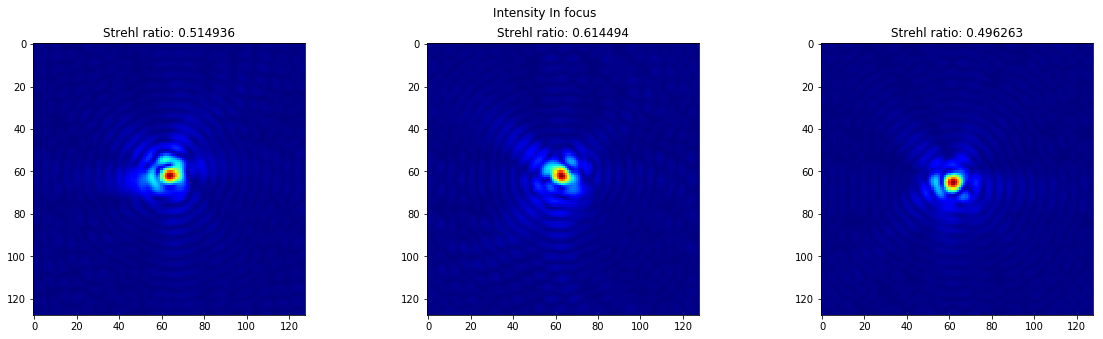

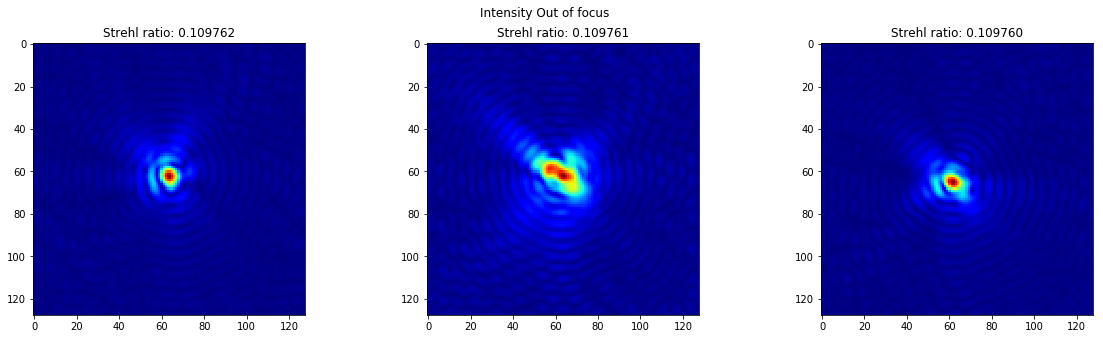

Output:


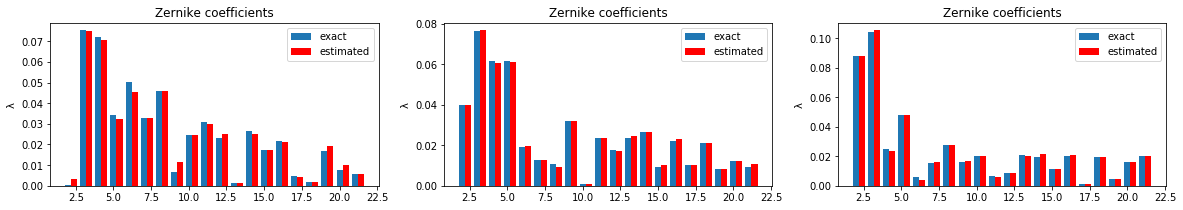

Phase error: ideal - estimated. The values are expressed in nm (wavelength = 2200nm).


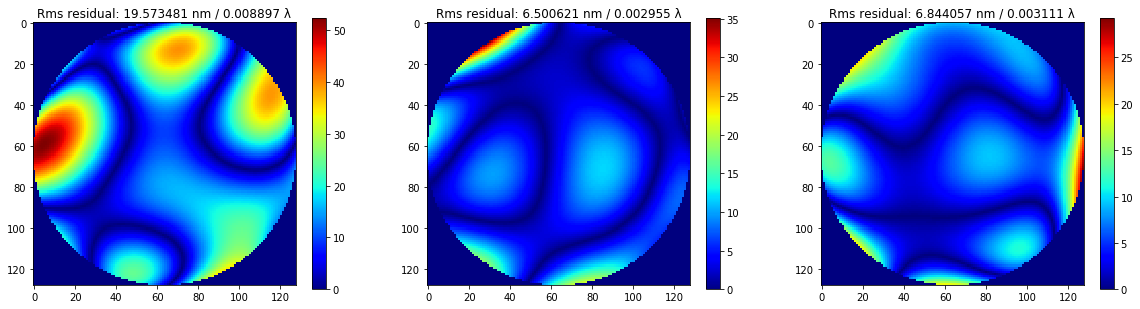

Reconstructed Point Spread function after phase correction


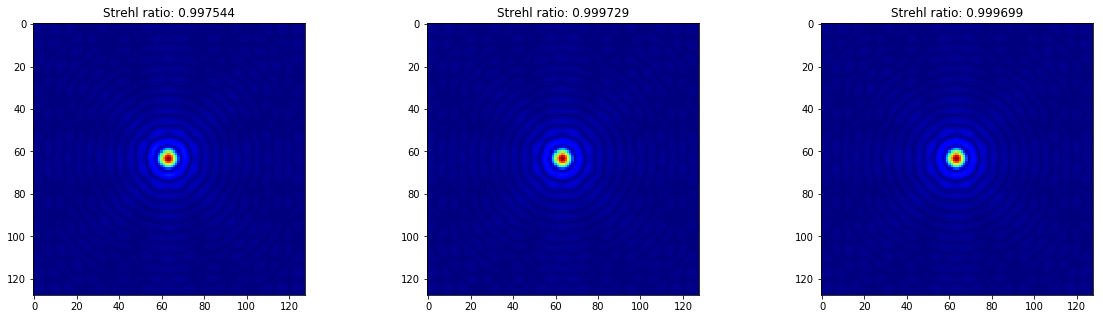

Metrics: 

Average in focus strehl: 0.534240
Average out focus strehl: 0.109761
Average in focus wfe rms: 327.983722 nm / 0.149084 λ
Average out focus wfe rms: 549.980472 nm / 0.249991 λ

 After correction: 

Average strehl: 0.999087
Average zernike rms error: 2.444284 nm / 0.001111 λ
Average phase wfe rms : 10.917691 nm / 0.004963 λ
Average Inference time : 0.069625 s


In [4]:
visualize(dataset, model)